# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [49]:
# Read the XLSX file
data = pd.read_csv("data/dataset_bronze.csv")

In [50]:
data.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,titre_original,nationalités,langue_d_origine,type_film,annee_production,budget,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",05/04/2023,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",The Super Mario Bros. Movie,U.S.A.,Anglais,Long-métrage,2023.0,NaN,7 178 203 entrées,"3,1","4,1",1022 Critiques Spectateurs,NaN,Alors qu’ils tentent de réparer une canalisati...,1 866 914
1,Les Vengeances de Maître Poutifard,28/06/2023,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",NaN,France,Français,Long-métrage,2023.0,NaN,421 927 entrées,"2,0","2,0",5 articles de presse,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180 735
2,Des mains en or,07/06/2023,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",NaN,France,Français,Long-métrage,2023.0,NaN,269 253 entrées,"2,2","3,4",6 articles de presse,NaN,"François, futur académicien, est un écrivain c...",109 081
3,The Covenant,23/06/2023,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",NaN,Grande-Bretagne,Anglais,Long-métrage,2023.0,NaN,NaN,"3,1","4,1",7 articles de presse,NaN,"Lors de sa dernière mission en Afghanistan, le...",6 380 188
4,"Cléo, Melvil et moi",05/07/2023,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",NaN,France,Français,Long-métrage,2023.0,NaN,2 306 entrées,"3,3","3,2",12 articles de presse,NaN,"Dans le Paris désert du premier confinement, A...",1 849


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11028 entries, 0 to 11027
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             11028 non-null  object 
 1   date              10394 non-null  object 
 2   genre             11028 non-null  object 
 3   durée             10806 non-null  float64
 4   réalisateur       11021 non-null  object 
 5   distributeur      11028 non-null  object 
 6   acteurs           10809 non-null  object 
 7   titre_original    4334 non-null   object 
 8   nationalités      11028 non-null  object 
 9   langue_d_origine  11028 non-null  object 
 10  type_film         11028 non-null  object 
 11  annee_production  11025 non-null  float64
 12  budget            3247 non-null   object 
 13  box_office_total  8980 non-null   object 
 14  note_presse       10743 non-null  object 
 15  note_spectateurs  8987 non-null   object 
 16  nombre_article    10464 non-null  object

In [52]:
data.shape

(11028, 20)

In [53]:
print(data['box_office_total'].unique())

['7 178 203 entrées' '421 927 entrées' '269 253 entrées' ... '219 entrées'
 '114 entrées' '1 289 entrées']


## <font color="green"> || - Missing Data </font>

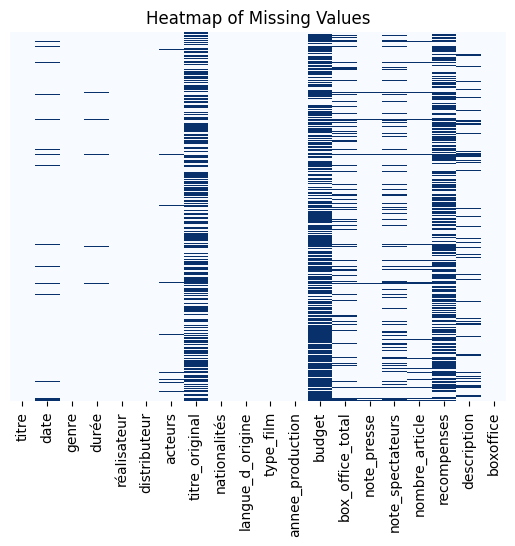

In [54]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [55]:
data.isnull().sum()

titre                  0
date                 634
genre                  0
durée                222
réalisateur            7
distributeur           0
acteurs              219
titre_original      6694
nationalités           0
langue_d_origine       0
type_film              0
annee_production       3
budget              7781
box_office_total    2048
note_presse          285
note_spectateurs    2041
nombre_article       564
recompenses         6711
description         1096
boxoffice              0
dtype: int64

In [56]:
colonnes_a_supprimer = ['titre_original', 'budget']
data = data.drop(colonnes_a_supprimer, axis=1)


In [57]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['acteurs'].isnull()]
lignes_nan.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
19,Les Grandes vacances de cowboy et indien,07/06/2023,"Animation,Famille",52.0,Vincent Patar,Cinéma Public Films,NaN,Belgique,Français,Long-métrage,2021.0,16 704 entrées,"3,8","3,3",NaN,NaN,"Cowboy et Indien, accompagnés de personnages l...",3 507
144,Limbo,NaN,"Epouvante-horreur,Thriller",NaN,Chris Peckover,-,NaN,U.S.A.,Anglais,Long-métrage,2019.0,NaN,"3,0",NaN,NaN,NaN,Une jeune mère se retrouve possédée par une en...,3 912
219,Apaches,NaN,Divers,NaN,Sean O'Keefe,-,NaN,U.S.A.,Anglais,Long-métrage,2012.0,NaN,NaN,NaN,NaN,NaN,Un groupe de policiers à la retraite décide de...,33 659
234,Titanic,NaN,Drame,NaN,Pier Angelo Mazzolotti,-,NaN,Italie,-,Long-métrage,1915.0,NaN,"2,9",NaN,NaN,NaN,"Lors de son voyage inaugural, le Titanic heurt...",498 212
310,Five,26/05/2004,Drame,74.0,Abbas Kiarostami,MK2 Diffusion,NaN,Iran,Farsi,Long-métrage,2003.0,NaN,"3,5","3,1",6 Critiques Spectateurs,NaN,1- La caméra accompagne un morceau de bois ave...,237 226


In [58]:
# Supprimer les lignes contenant des NaN dans la colonne 'acteurs'
data = data.dropna(subset=['acteurs'])

In [59]:
# Supprimer les lignes contenant des NaN dans la colonne 'acteurs'
data = data.dropna(subset=['réalisateur'])

In [60]:
data.shape

(10806, 18)

In [61]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['durée'].isnull()]
lignes_nan.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
164,Joker,NaN,"Comédie,Science fiction",NaN,Shirish Kunder,-,"Akshay Kumar,Sonakshi Sinha,Anjaan Srivastav",Inde,Hindi,Long-métrage,2012.0,NaN,"2,8",NaN,1 Critique Spectateur,NaN,"En 1947, lors de la scission de l'Inde et du P...",1 576 425
165,Joker,NaN,"Comédie,Science fiction",NaN,Shirish Kunder,-,"Akshay Kumar,Sonakshi Sinha,Anjaan Srivastav",Inde,Hindi,Long-métrage,2012.0,NaN,"2,8",NaN,1 Critique Spectateur,NaN,"En 1947, lors de la scission de l'Inde et du P...",196 170
183,En eaux troubles,NaN,Policier,NaN,Robby Henson,-,"Billy Bob Thornton,Patricia Arquette,Sela Ward",U.S.A.,Anglais,Long-métrage,2002.0,NaN,"3,0",NaN,9 Critiques Spectateurs,NaN,"Dans une petite ville de l'Amérique profonde, ...",710 798
184,En eaux troubles,NaN,Policier,NaN,Robby Henson,-,"Billy Bob Thornton,Patricia Arquette,Sela Ward",U.S.A.,Anglais,Long-métrage,2002.0,NaN,"3,0",NaN,9 Critiques Spectateurs,NaN,"Dans une petite ville de l'Amérique profonde, ...",3 066
261,Carmen,NaN,Drame,NaN,Jacques Malaterre,-,"Kevyn Diana,Vicky Luengo,Bernard Blancan",France,Français,Télefilm,2010.0,NaN,"2,5",NaN,NaN,NaN,Une libre adaptation du classique de Prosper M...,24 397


In [62]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data['durée'].mean()
data['durée'] = data['durée'].fillna(moyenne_colonne)

In [63]:
data.isnull().sum()

titre                  0
date                 554
genre                  0
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine       0
type_film              0
annee_production       0
box_office_total    1963
note_presse          224
note_spectateurs    1923
nombre_article       445
recompenses         6497
description         1076
boxoffice              0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [64]:
data.duplicated().sum()

2

In [65]:
data = data.drop_duplicates()

## <font color="green"> IV - Nettoyage Données Quantitatives </font>

In [66]:
def convert_data_types(df):
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Convertir la colonne 'durée' en type float
    df['durée'] = pd.to_numeric(df['durée'], errors='coerce')

    # Convertir la colonne 'annee_production' en type int
    df['annee_production'] = df['annee_production'].astype(int)

    # Convertir les colonnes 'note_presse' et 'note_spectateurs' en type float
    df['note_presse'] = pd.to_numeric(df['note_presse'].str.replace(',', '.'), errors='coerce')
    df['note_spectateurs'] = pd.to_numeric(df['note_spectateurs'].str.replace(',', '.'), errors='coerce')

    # Convertir la colonne 'nombre_article' en type int en gardant seulement le nombre
    df['nombre_article'] = df['nombre_article'].str.extract('(\d+)').astype(float)

    # Enlever le texte dans la colonne 'box_office_total' et convertir en type int
    df['box_office_total'] = df['box_office_total'].str.replace(' ', '').str.replace('entrées', '')

    # Convert the 'box_office_total' column to type int using pd.to_numeric with errors='coerce'
    df['box_office_total'] = pd.to_numeric(df['box_office_total'], errors='coerce').astype('Int64')
    
    # Convertir la colonne 'boxoffice' en type int
    df['boxoffice'] = df['boxoffice'].str.replace(' ', '').astype(int)

    return df

In [67]:
data_propre = convert_data_types(data)

In [68]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data_propre['note_presse'].mean()
data_propre['note_presse'] = data_propre['note_presse'].fillna(moyenne_colonne)

In [69]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data_propre['note_spectateurs'].mean()
data_propre['note_spectateurs'] = data_propre['note_spectateurs'].fillna(moyenne_colonne)

In [70]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
1,Les Vengeances de Maître Poutifard,NaT,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",France,Français,Long-métrage,2023,421927,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
2,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
3,The Covenant,NaT,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",Grande-Bretagne,Anglais,Long-métrage,2023,<NA>,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188
4,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849


In [71]:
data_propre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10804 entries, 0 to 11027
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   titre             10804 non-null  object        
 1   date              4178 non-null   datetime64[ns]
 2   genre             10804 non-null  object        
 3   durée             10804 non-null  float64       
 4   réalisateur       10804 non-null  object        
 5   distributeur      10804 non-null  object        
 6   acteurs           10804 non-null  object        
 7   nationalités      10804 non-null  object        
 8   langue_d_origine  10804 non-null  object        
 9   type_film         10804 non-null  object        
 10  annee_production  10804 non-null  int64         
 11  box_office_total  8841 non-null   Int64         
 12  note_presse       10804 non-null  float64       
 13  note_spectateurs  10804 non-null  float64       
 14  nombre_article    10359 non

In [72]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,"Animation,Comédie,Famille",92.0,Aaron Horvath,Universal Pictures International France,"Pierre Tessier,Chris Pratt,Jérémie Covillault",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
1,Les Vengeances de Maître Poutifard,NaT,"Comédie,Famille",90.0,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",France,Français,Long-métrage,2023,421927,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
2,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"Lambert Wilson,Josiane Balasko,Sylvie Testud",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
3,The Covenant,NaT,"Action,Guerre,Thriller",123.0,Guy Ritchie,-,"Jake Gyllenhaal,Dar Salim,Alexander Ludwig",Grande-Bretagne,Anglais,Long-métrage,2023,<NA>,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188
4,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"Arnaud Viard,Marianne Denicourt,Romane Bohringer",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849


In [73]:
print(data_propre['type_film'].unique())

['Long-métrage' 'Télefilm' 'Film à sketches' 'Sérials']


In [74]:
print(data_propre['box_office_total'].unique())

<IntegerArray>
[7178203,  421927,  269253,    <NA>,    2306,    1745,    1273,   43349,
  239211, 3337102,
 ...
     148,    1071,     740,     343,    1350,    2507,     491,     219,
     114,    1289]
Length: 8081, dtype: Int64


## <font color="green"> V - Nettoyage Données Qualitatives </font>

In [75]:
print(data_propre['genre'].unique())

['Animation,Comédie,Famille' 'Comédie,Famille' 'Comédie'
 'Action,Guerre,Thriller' 'Comédie dramatique' 'Drame,Historique,Romance'
 'Drame' 'Biopic,Drame' 'Aventure,Historique' 'Biopic,Drame,Musical'
 'Action' 'Action,Comédie' 'Thriller'
 'Epouvante-horreur,Science fiction,Thriller'
 'Biopic,Epouvante-horreur,Fantastique' 'Policier,Thriller'
 'Epouvante-horreur' 'Animation,Famille,Fantastique'
 'Comédie musicale,Drame' 'Drame,Romance' 'Aventure,Fantastique'
 'Action,Espionnage,Thriller' 'Action,Science fiction,Thriller'
 'Action,Thriller' 'Drame,Romance,Thriller'
 'Action,Arts Martiaux,Comédie,Drame,Science fiction'
 'Comédie,Comédie dramatique,Drame' 'Aventure,Famille,Fantastique'
 'Science fiction,Thriller' 'Aventure,Comédie' 'Action,Policier'
 'Aventure,Science fiction' 'Comédie,Drame,Romance,Science fiction'
 'Action,Drame,Science fiction' 'Drame,Thriller' 'Drame,Policier,Thriller'
 'Action,Aventure,Science fiction' 'Action,Aventure,Fantastique'
 'Epouvante-horreur,Science fiction'

In [76]:
# def nettoyage_qualita(df):
#     # Clean 'titre' column by removing leading/trailing whitespaces
#     df['titre'] = df['titre'].str.strip()
#     # Clean 'genre' column by filling missing values with an appropriate placeholder (e.g., 'Unknown')
#     # Clean 'genre' column by replacing missing values with NaN
#     df['genre'] = df['genre'].replace('', np.nan)
    
#     df['réalisateur'] = df['réalisateur'].str.strip()
#     # Clean 'distributeur' column by removing leading/trailing whitespaces
#     df['distributeur'] = df['distributeur'].str.strip()
#     # Clean 'acteurs' column by splitting the names into a list
#     df['acteurs'] = df['acteurs'].str.split(',')
#     # Clean 'langue_d_origine' column by removing leading/trailing whitespaces
#     df['langue_d_origine'] = df['langue_d_origine'].str.strip()
#     df['langue_d_origine'] = df['langue_d_origine'].replace('-', np.nan)
#     df['langue_d_origine'] = df['langue_d_origine'].replace('""', np.nan)

#     df['distributeur'] = df['distributeur'].replace('-', np.nan)

    
#     # Clean 'type_film' column by filling missing values with 'Unknown'
#     df['type_film'] = df['type_film'].replace('', np.nan)
#     # Clean 'description' column by removing leading/trailing whitespaces
#     df['description'] = df['description'].str.strip()

#     return df

def nettoyage_qualita(df):
    # Clean 'titre' column by removing leading/trailing whitespaces
    df['titre'] = df['titre'].str.strip()
    # Clean 'genre' column by filling missing values with an appropriate placeholder (e.g., 'Unknown')
    # Clean 'genre' column by replacing missing values with NaN
    #------------------------------------------
    # Clean 'date' column by converting it to datetime and keeping only valid dates
    # df['date'] = pd.to_datetime(df['date'], errors='coerce')
    # df = df.dropna(subset=['date'])
    # #------------------------------------------
    # # Remove rows where 'type_film' column contains 'Téléfilm' or 'Film à sketches'
    df = df[~df['type_film'].isin(['Téléfilm', 'Film à sketches'])]
    # #------------------------------------------
    df['genre'] = df['genre'].replace('', np.nan)
    df['genre'] = df['genre'].str.replace(',', '_')
    #  # Supprimer les lignes contenant "Comédie" ou "Guerre" dans la colonne 'genre'
    # #  # Appliquer la fonction de regroupement des genres à la colonne 'genre'
    # df['genre'] = df['genre'].apply(regrouper_genres)
    
    # # Supprimer les lignes contenant des valeurs qui sont pas type 'genre'
    df = df[~df['genre'].str.contains('mai 1960|janvier 1974|""|août 1978|octobre 1972|décembre 1960|2018|nan', na=False)]
    
    #------------------------------------------
    df['réalisateur'] = df['réalisateur'].str.strip()
    df['réalisateur'] = df['réalisateur'].replace('-', 'inconnu')
    #------------------------------------------
    # Clean 'distributeur' column by removing leading/trailing whitespaces
    df['distributeur'] = df['distributeur'].str.strip()
    df['distributeur'] = df['distributeur'].replace('-', 'inconnu')
    #------------------------------------------
    # Clean 'acteurs' column by splitting the names into a list
    df['acteurs'] = df['acteurs'].str.split(',')
    #------------------------------------------
    # Remplacer la liste dans la colonne 'langue_d_origine' par la première valeur de la liste
    df['langue_d_origine'] = df['langue_d_origine'].str.split(',').str[0]
    # Clean 'langue_d_origine' column by removing leading/trailing whitespaces
    df['langue_d_origine'] = df['langue_d_origine'].str.strip()
    df['langue_d_origine'] = df['langue_d_origine'].replace('-', np.nan)
    # Remove rows with NaN values in the 'langue_d_origine' column
    df = df.dropna(subset=['langue_d_origine'])
    # df['langue_d_origine'] = df['langue_d_origine'].replace('', 'inconnu')
    #------------------------------------------
    # Clean 'type_film' column by filling missing values with 'Unknown'
    df['type_film'] = df['type_film'].replace('', np.nan)
    #------------------------------------------
    # Clean 'description' column by removing leading/trailing whitespaces
    df['description'] = df['description'].str.strip()
    #------------------------------------------
    
    return df

In [77]:
data_propre = nettoyage_qualita(data_propre)

/tmp/ipykernel_49535/538077691.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].replace('', np.nan)
/tmp/ipykernel_49535/538077691.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].str.replace(',', '_')


In [78]:
# # Split the values in the 'nationalités' column by commas and create a list of nationalities
# data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# # Flatten the list of nationalities and remove leading/trailing whitespaces
# data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: [nationality.strip() for nationality in x])

In [79]:
data_propre.head()

,titre,date,genre,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice
0,"Super Mario Bros, le film",2023-05-04,Animation_Comédie_Famille,92.0,Aaron Horvath,Universal Pictures International France,"[Pierre Tessier, Chris Pratt, Jérémie Covillault]",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914
1,Les Vengeances de Maître Poutifard,NaT,Comédie_Famille,90.0,Pierre-François Martin-Laval,UGC Distribution,"[Christian Clavier, Isabelle Nanty, Jennie-Ann...",France,Français,Long-métrage,2023,421927,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735
2,Des mains en or,2023-07-06,Comédie,90.0,Isabelle Mergault,Zinc Film,"[Lambert Wilson, Josiane Balasko, Sylvie Testud]",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081
3,The Covenant,NaT,Action_Guerre_Thriller,123.0,Guy Ritchie,inconnu,"[Jake Gyllenhaal, Dar Salim, Alexander Ludwig]",Grande-Bretagne,Anglais,Long-métrage,2023,<NA>,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188
4,"Cléo, Melvil et moi",2023-05-07,Comédie dramatique,73.0,Arnaud Viard,Moonlight Films Distribution,"[Arnaud Viard, Marianne Denicourt, Romane Bohr...",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849


In [80]:
# Fill NaN values in 'genre' column with an empty list
data_propre['genre'].fillna("", inplace=True)

# Convertir la colonne 'genre' en une liste de genres distincts pour chaque film
data_propre['genres'] = data_propre['genre'].str.split(',')

# Créer un dictionnaire avec tous les genres uniques en tant que clés, et des listes de 0 et 1 comme valeurs
genres_dict = {}
for genres_list in data_propre['genres']:
    for genre in genres_list:
        genre = genre.strip()  # Supprimer les espaces en début et fin de genre
        if genre not in genres_dict:
            genres_dict[genre] = []

In [81]:
colonnes_a_supprimer = ['genre']
data_propre = data_propre.drop(colonnes_a_supprimer, axis=1)

In [82]:
data_propre.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice,genres
0,"Super Mario Bros, le film",2023-05-04,92.0,Aaron Horvath,Universal Pictures International France,"[Pierre Tessier, Chris Pratt, Jérémie Covillault]",U.S.A.,Anglais,Long-métrage,2023,7178203,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914,[Animation_Comédie_Famille]
1,Les Vengeances de Maître Poutifard,NaT,90.0,Pierre-François Martin-Laval,UGC Distribution,"[Christian Clavier, Isabelle Nanty, Jennie-Ann...",France,Français,Long-métrage,2023,421927,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735,[Comédie_Famille]
2,Des mains en or,2023-07-06,90.0,Isabelle Mergault,Zinc Film,"[Lambert Wilson, Josiane Balasko, Sylvie Testud]",France,Français,Long-métrage,2023,269253,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081,[Comédie]
3,The Covenant,NaT,123.0,Guy Ritchie,inconnu,"[Jake Gyllenhaal, Dar Salim, Alexander Ludwig]",Grande-Bretagne,Anglais,Long-métrage,2023,<NA>,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188,[Action_Guerre_Thriller]
4,"Cléo, Melvil et moi",2023-05-07,73.0,Arnaud Viard,Moonlight Films Distribution,"[Arnaud Viard, Marianne Denicourt, Romane Bohr...",France,Français,Long-métrage,2023,2306,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849,[Comédie dramatique]


In [83]:
# Fill NaN values in 'genre' column with an empty list
data_propre['langue_d_origine'].fillna("", inplace=True)

# Convertir la colonne 'genre' en une liste de genres distincts pour chaque film
data_propre['langue_d_origine'] = data_propre['langue_d_origine'].str.split(',')

# Créer un dictionnaire avec tous les genres uniques en tant que clés, et des listes de 0 et 1 comme valeurs
lang_dict = {}
for lng_list in data_propre['langue_d_origine']:
    for lng in lng_list:
        lng = lng.strip()  # Supprimer les espaces en début et fin de genre
        if genre not in lang_dict:
            lang_dict[lng] = []

In [84]:
data_propre.isnull().sum()

titre                  0
date                6569
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine       0
type_film              0
annee_production       0
box_office_total    1907
note_presse            0
note_spectateurs       0
nombre_article       426
recompenses         6430
description         1069
boxoffice              0
genres                 0
dtype: int64

In [85]:
nationnalité_individual = data_propre['nationalités'].explode()

# Éliminer les doublons pour obtenir les genres uniques
nationnalité_uniques = nationnalité_individual.drop_duplicates()

In [86]:
nationnalité_uniques.shape

(117,)

In [87]:
genre_csv = data_propre['genres'].explode()

# Éliminer les doublons pour obtenir les genres uniques
genre_csv = genre_csv.drop_duplicates()

In [88]:
langue_d_origine_gh = data_propre['langue_d_origine'].explode()

# Éliminer les doublons pour obtenir les genres uniques
langue_d_origine_gh = langue_d_origine_gh.drop_duplicates()

In [89]:
langue_d_origine_gh.shape

(82,)

In [90]:
langue_d_origine_gh.to_csv('langue_d_origine_gh.csv', index=False)

In [91]:
genre_csv.to_csv('genre_unique.csv', index=False)

In [92]:
genre_csv = data_propre['acteurs']


In [93]:
# Sauvegarder les genres uniques dans un fichier CSV
nationnalité_uniques.to_csv('nationnalité_uniques.csv', index=False)

## <font color="green"> VI- Export silver Data </font>

In [94]:
#EXporter la data dans un Csv 
data_propre.to_csv('data/dataset_silver.csv', index=False)